# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Rindu Prawa Indraswari
- **Email:** rprawa04@gmail.com
- **ID Dicoding:** rinduprawa

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografis customers dan sellers berdasarkan city dan state nya?
- Kategori produk apa yang memiliki jumlah rating tertinggi dan terendah terbanyak?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customer_df = pd.read_csv('data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
category_name_df = pd.read_csv('data/product_category_name_translation.csv')
category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Untuk menjawab pertanyaan bisnis yang telah dibuat, maka dataset yang akan digunakan adalah dataset customer, seller, produk serta category translationnya, order, order item, dan order review
- Semua dataset yang dibutuhkan telah berhasil dimuat

### Assessing Data

#### 1. Menilai tabel `customer_df`

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


> (✅) Dapat dilihat bahwa tidak ada keanehan jumlah ataupun kesalahan tipe data pada tabel customer

In [11]:
print('Duplicated:', customer_df.duplicated().sum())
customer_df.describe()

Duplicated: 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 2. Menilai tabel `order_items_df`

In [12]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


> (❌) Dapat dilihat bahwa terdapat kesalahan tipe data pada **shipping_limit_date** yang seharusnya bertipe **datetime**

In [13]:
print('Duplicated: ', order_items_df.duplicated().sum())
order_items_df.describe()

Duplicated:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 3. Menilai tabel `order_reviews`

In [14]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


> (❌) Dapat dilihat bahwa terdapat keanehan pada jumlah **review_comment_title** dan **review_comment_message** serta kesalahan tipe data pada **review_creation_date** dan **review_answer_timestamp** yang seharusnya bertipe **datetime**

In [15]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

> (❌) Karena ada keanehan jumlah data maka perlu pengecekan lebih lanjut, dapat dilihat bahwa terdapat banyak missing value pada **review_comment_title** dan **review_comment_message**

In [16]:
print('Duplicated: ', order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Duplicated:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 4. Menilai tabel `orders_df`

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


> (❌) Dapat dilihat bahwa terdapat keanehan pada jumlah **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date** serta kesalahan tipe data pada **kolom indeks ke-3 hingga ke-7** yang seharusnya bertipe **datetime**

In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

> (❌) Karena ada keanehan jumlah maka perlu pengecekan lebih lanjut, dapat dilihat bahwa terdapat banyak missing value pada **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**

In [19]:
print('Duplicated: ', orders_df.duplicated().sum())
orders_df.describe()

Duplicated:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 5. Menilai tabel `products_df`

In [20]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


> (❌) Dapat dilihat bahwa terdapat keanehan pada jumlah beberapa kolom yang berbeda-beda

In [21]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

> (❌) Karena ada keanehan jumlah maka perlu pengecekan lebih lanjut, dapat dilihat bahwa terdapat sejumlah missing value pada beberapa kolom

In [22]:
print('Duplicated: ', products_df.duplicated().sum())
products_df.describe()

Duplicated:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 6. Menilai tabel `sellers_df`

In [23]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


> (✅) Dapat dilihat bahwa tidak ada keanehan jumlah ataupun kesalahan tipe data pada tabel seller

In [24]:
print('Duplicated: ', sellers_df.duplicated().sum())
sellers_df.describe()

Duplicated:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


> (✅) Dapat dilihat bahwa tidak ada duplikasi data ataupun keanehan dari sisi descriptive stats

#### 7. Menilai tabel `category_name_df`

In [25]:
category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
print('Duplicated: ', category_name_df.duplicated().sum())
category_name_df.describe()

Duplicated:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


> (✅) Dapat dilihat bahwa tidak ada keanehan jumlah, kesalahan tipe data, duplikasi data, ataupun keanehan dari sisi descriptive stats

**Insight:**


Hasil dari assessing ketujuh tabel adalah terdapat sejumlah missing value dan kesalahan tipe data pada beberapa tabel.
- order_items_df: inaccurate dtypes
- order_reviews_df: missing value, inaccurate dtypes
- orders_df: missing value, inaccurate dtypes
- products_df: missing value

### Cleaning Data

#### 1. Membersihkan tabel `order_items_df`

In [27]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### 2. Membersihkan tabel `order_reviews_df`

##### Missing value

In [28]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [29]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [30]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [31]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                        230
Bom                                                                                                                              189
muito bom                                                                                                                        122
bom                                                                                                                              107
Recomendo                                                                                                                        100
                                                                                                                                ... 
para este produto recebi de acordo com a compra realizada!                                                                         1
Entregou dentro do prazo. O produto chegou em 

> Berdasarkan kedua tabel di atas, dapat dilihat bahwa data tersebut masih memiliki banyak informasi penting, jadi menggunakan metode dropping akan merugikan. Solusi kedua adalah menggunakan metode imputation. Karena komen review dari customer bersifat opsional dan harus disesuaikan dengan review score yang mereka beri, maka akan lebih baik jika menggantinya dengan keterangan 'no comment' yang lebih bersifat netral. (Akan tidak masuk akal jika score yang diberikan bernilai 1 namun title nya 'recomendo' atau message nya 'muito bom')

In [32]:
order_reviews_df.fillna(value='Sem comentários', inplace=True)
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Inaccurate data type

In [33]:
datetime_columns_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns_or:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### 3. Membersihkan tabel `orders_df`

##### Inaccurate data type

In [34]:
datetime_columns_o = ["order_purchase_timestamp", 
                      "order_approved_at", 
                      "order_delivered_carrier_date", 
                      "order_delivered_customer_date", 
                      "order_estimated_delivery_date"]

for columns in datetime_columns_o:
    orders_df[columns] = pd.to_datetime(orders_df[columns])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing value

In [35]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [36]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [37]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


> Berdasarkan ketiga tabel di atas, dapat dilihat bahwa nilai yang hilang bertipe data datetime, maka metode yang paling sesuai adalah interpolation

In [38]:
interpolate_columns = ["order_approved_at", 
                       "order_delivered_carrier_date", 
                       "order_delivered_customer_date"]

for column in interpolate_columns:
    orders_df[column] = orders_df[column].interpolate(method='linear')

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### 4. Membersihkan tabel `products_df`

In [39]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [40]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [41]:
products_df['product_category_name'] = products_df['product_category_name'].fillna("cama_mesa_banho")

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
median_column = ['product_name_lenght',
                 'product_description_lenght',
                 'product_photos_qty',
                 'product_weight_g',
                 'product_length_cm',
                 'product_height_cm',
                 'product_width_cm']

for column in median_column:
    mv_median = products_df[column].median()
    products_df[column] = products_df[column].fillna(mv_median)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**

Pembersihan data telah dilakukan untuk keempat tabel
 
*order_items_df*: 
- shipping_limit_date (object to datetime)

*order_reviews_df*: 
- review_creation_date (object to datetime)
- review_answer_timestamp (object to datetime)
- review_comment_title (NaN to 'Sem comentários')
- review_comment_message (NaN to 'Sem comentários')

*orders_df*:
- order_purchase_timestamp (object to datetime)
- order_approved_at (object to datetime)
- order_delivered_carrier_date (object to datetime)
- order_delivered_customer_date (object to datetime)
- order_estimated_delivery_date (object to datetime)
- order_approved_at (interpolation)
- order_delivered_carrier_date (interpolation)
- order_delivered_customer_date (interpolation)

*products_df*:
- product_category_name (NaN to 'cama_mesa_banho')
- product_name_lenght (NaN to median)
- product_description_lenght (NaN to median)
- product_photos_qty (NaN to median)
- product_weight_g (NaN to median)
- product_length_cm (NaN to median)
- product_height_cm (NaN to median)
- product_width_cm (NaN to median)

## Exploratory Data Analysis (EDA)

### Explore `customer_df`

In [43]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
76206,51e2e34bb7261dfad6cdaedc9f1a4350,de7581f6d9e04d67f2018d43df7ab119,2046,sao paulo,SP
84446,8e088f86db422c6032a26ee8ba1ef0e3,5942dde582a33e31ea4471bc5363b0f3,29018,vitoria,ES
6146,f10bede7fdee22ce94b43d2f699b7b51,cf0a56ec871e7e5bd6d6d8909cb7f26b,8730,mogi das cruzes,SP
32168,cda7a35132d1ec8eb2458225ec277e27,dc9f99eb8458b74aea47c32170ae1374,9132,santo andre,SP
14478,389cdd5e626afc3511798506cea06a36,2229bc0a07b40d6c43c3551d97745105,35164,ipatinga,MG


In [44]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [45]:
customer_df.customer_id.is_unique

True

In [46]:
customer_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

> Berdasarkan pivot tabel di atas, customer paling banyak berada di kota sao paulo

In [47]:
customer_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

> Berdasakan pivot tabel di atas, customer paling banyak berada di state atau negara bagian SP

### Explore `orders_df`

In [48]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
39298,1a8e038996bda6eec89b10dce066e0c9,09126adc44fa5fa5de202278c2538cf8,delivered,2017-09-26 10:59:31,2017-09-26 11:40:06,2017-10-03 10:32:04,2017-10-06 21:40:06,2017-10-24
84627,f9f5a6122ac5d668e8bf05b61354507e,2e63252a47cbfe8033e3b65e00e13f1a,delivered,2018-04-04 15:18:25,2018-04-04 18:28:22,2018-04-05 18:50:36,2018-04-18 19:07:51,2018-05-08
3776,12c086e6bfc59c3a3ec7e77d5d1a6b17,549b71495b4abb6a6db77aaa5564f593,delivered,2018-05-06 21:06:39,2018-05-08 19:34:47,2018-05-09 12:47:00,2018-05-10 11:35:56,2018-05-22
68339,349021a1c38809e4b11418c2f8586c97,3da978bdc9235f7e0b3ae3e0415bbdc1,delivered,2018-04-07 09:08:26,2018-04-07 09:15:18,2018-04-10 19:50:53,2018-04-12 20:58:39,2018-04-25
12756,4f017431bb604b83864ddacd57e505e4,bbbbb2b0c3acafd69a8ce2c286802458,delivered,2018-04-22 12:33:15,2018-04-24 18:40:18,2018-04-24 19:32:45,2018-04-30 17:12:17,2018-05-16


In [49]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
42716,5e8e2246d1b5e113efb8958d9b9fd9de,446178189afff5d8bc533ad62ccde8e4,delivered,2018-08-06 21:30:56,2018-08-06 21:50:16,2018-08-08 14:32:00,2018-08-09 15:33:45,2018-08-10,1.0
17443,62d3261f3aa7517f7d03885db3ea7a97,ead07f22e441e8d3ae62485b2e760a56,delivered,2017-12-14 11:06:55,2017-12-14 11:18:27,2017-12-18 23:08:46,2017-12-22 20:28:36,2018-01-09,4.0
92205,7fe1044f8a2fca89a6cc85fead509a72,4ba9c05e899062d31966848590dcb9c2,delivered,2018-04-19 07:46:25,2018-04-20 07:31:44,2018-04-20 19:24:29,2018-04-23 16:12:29,2018-05-02,3.0
23545,3dc8ca7de518eae32ebe7dc2dad8ae77,56280bfbcefb145b91a360ba0ebe9bd9,delivered,2018-03-06 10:39:28,2018-03-06 11:20:22,2018-03-07 18:17:20,2018-03-08 19:50:53,2018-03-16,1.0
90593,fb05a4b251a54957ff9a86d515f98289,35a19e7eb76e917f62eb26b58ace0d2f,delivered,2018-05-05 18:59:56,2018-05-05 19:10:49,2018-05-09 15:48:00,2018-06-08 20:09:56,2018-06-05,30.0


### Explore `orders_df` & `customers_df`

In [50]:
order_customer_df = pd.merge(
    left=orders_df,
    right=customer_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [51]:
order_customer_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [52]:
order_customer_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

> Sama dengan pivot tabel customer, kedua pivot tabel di atas juga menghasilkan informasi bahwa customer yang melakukan order paling banyak berada di state SP dan kota sao paulo

### Explore `order_reviews_df` & `order_customer_df`

In [53]:
new_customer_df = pd.merge(
    left=order_customer_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
new_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Sem comentários,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,Sem comentários,Sem comentários,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,Sem comentários,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,Sem comentários,Sem comentários,2018-02-17,2018-02-18 13:02:51


### Explore `order_items_df` & `sellers_df`

In [54]:
order_item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
order_item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [55]:
order_item_seller_df.groupby(by='seller_state').order_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
Name: order_id, dtype: int64

In [56]:
order_item_seller_df.groupby(by='seller_city').order_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo                24588
ibitinga                  6565
curitiba                  2722
santo andre               2711
belo horizonte            2414
rio de janeiro            2193
guarulhos                 2071
ribeirao preto            2019
sao jose do rio preto     1973
maringa                   1860
Name: order_id, dtype: int64

### Explore `products_df` & `category_name_df`

In [57]:
new_product_df = pd.merge(
    left=products_df,
    right=category_name_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [58]:
new_product_df = new_product_df.reindex(['product_id', 
                                         'product_category_name',
                                         'product_category_name_english', 
                                         'product_name_lenght', 
                                         'product_description_lenght', 
                                         'product_photos_qty',
                                         'product_weight_g', 
                                         'product_length_cm', 
                                         'product_height_cm',
                                         'product_width_cm'], axis=1)
new_product_df.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [59]:
new_product_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3639
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [60]:
new_product_df.groupby(by='product_category_name_english').product_id.nunique().sort_values().head(10)

product_category_name_english
cds_dvds_musicals                     1
security_and_services                 2
home_comfort_2                        5
fashion_childrens_clothes             5
tablets_printing_image                9
furniture_mattress_and_upholstery    10
la_cuisine                           10
diapers_and_hygiene                  12
flowers                              14
fashion_sport                        19
Name: product_id, dtype: int64

### Explore `order_items_seller` & `new_product_df`

In [61]:
new_seller_df = pd.merge(
    left=order_item_seller_df,
    right=new_product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
new_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [62]:
new_seller_df.groupby(by='product_category_name_english').agg({
    'product_id': 'nunique',
    'price': ['min', 'max', 'mean']
})

product_id  price                     
                                 nunique    min      max        mean
product_category_name_english                                       
agro_industry_and_commerce            74  12.99  2990.00  342.124858
air_conditioning                     124  10.90  1599.00  185.269226
art                                   55   3.50  6499.00  115.802105
arts_and_craftmanship                 19   9.80   289.49   75.583750
audio                                 58  14.90   598.99  139.254121
...                                  ...    ...      ...         ...
stationery                           849   2.29  1693.00   91.753369
tablets_printing_image                 9  14.90   889.99   90.703735
telephony                           1134   5.00  2428.00   71.213978
toys                                1411   4.90  1699.99  117.548360
watches_gifts                       1329   8.99  3999.90  201.135984

[71 rows x 4 columns]

### Explore all data

In [63]:
all_df = pd.merge(
    left = new_customer_df,
    right = new_seller_df,
    how='left',
    left_on='order_id',
    right_on='order_id',
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,MG,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,SP,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [64]:
all_df.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           10860
health_beauty             8836
sports_leisure            7720
computers_accessories     6689
furniture_decor           6449
housewares                5884
watches_gifts             5624
telephony                 4199
auto                      3897
toys                      3886
Name: order_id, dtype: int64

In [65]:
all_df.groupby(by='product_category_name_english').order_id.nunique().sort_values().head(10)

product_category_name_english
security_and_services         2
fashion_childrens_clothes     8
cds_dvds_musicals            12
la_cuisine                   13
arts_and_craftmanship        23
home_comfort_2               24
fashion_sport                27
diapers_and_hygiene          27
flowers                      29
music                        38
Name: order_id, dtype: int64

In [66]:
all_df.groupby(by=['product_category_name_english', 'review_score']).product_id.nunique()

product_category_name_english  review_score
agro_industry_and_commerce     1.0               17
                               2.0                6
                               3.0               10
                               4.0               30
                               5.0               39
                                               ... 
watches_gifts                  1.0              308
                               2.0              118
                               3.0              243
                               4.0              456
                               5.0             1004
Name: product_id, Length: 340, dtype: int64

**Insight:**
- Explorasi data menghasilkan beberapa tabel baru, yaitu order_customer_df, new_customer_df, order_item_seller_df, new_product_df, new_seller_df, dan all_df
- Dari eksplorasi all data, dapat dilihat bahwa kategori produk yang paling banyak terjual adalah bed_bath_table. Sedangkan kategori yang paling sedikit terjual adalah security_and_services.
- Custommer dan Seller paling banyak berada pada kota sao paulo dan negara bagian SP
- Pivot table terakhir menunjukan jumlah review score dari setiap kategori produk yang nanti akan digunakan untuk mengidentifikasi kategori apa yang memiliki review score 1-5 tertinggi dan terendah.

## Visualization & Explanatory Analysis

### Kategori produk apa yang paling banyak dan paling sedikit terjual? 

In [67]:
sum_order_item_df = all_df.groupby("product_category_name_english").order_id.nunique().reset_index().sort_values(by="order_id", ascending=False)
sum_order_item_df = sum_order_item_df.rename(columns={'product_category_name_english': 'category',
                                                        'order_id': 'product_count'})
sum_order_item_df.head(10)

,category,product_count
7,bed_bath_table,10860
43,health_beauty,8836
65,sports_leisure,7720
15,computers_accessories,6689
39,furniture_decor,6449
49,housewares,5884
70,watches_gifts,5624
68,telephony,4199
5,auto,3897
69,toys,3886


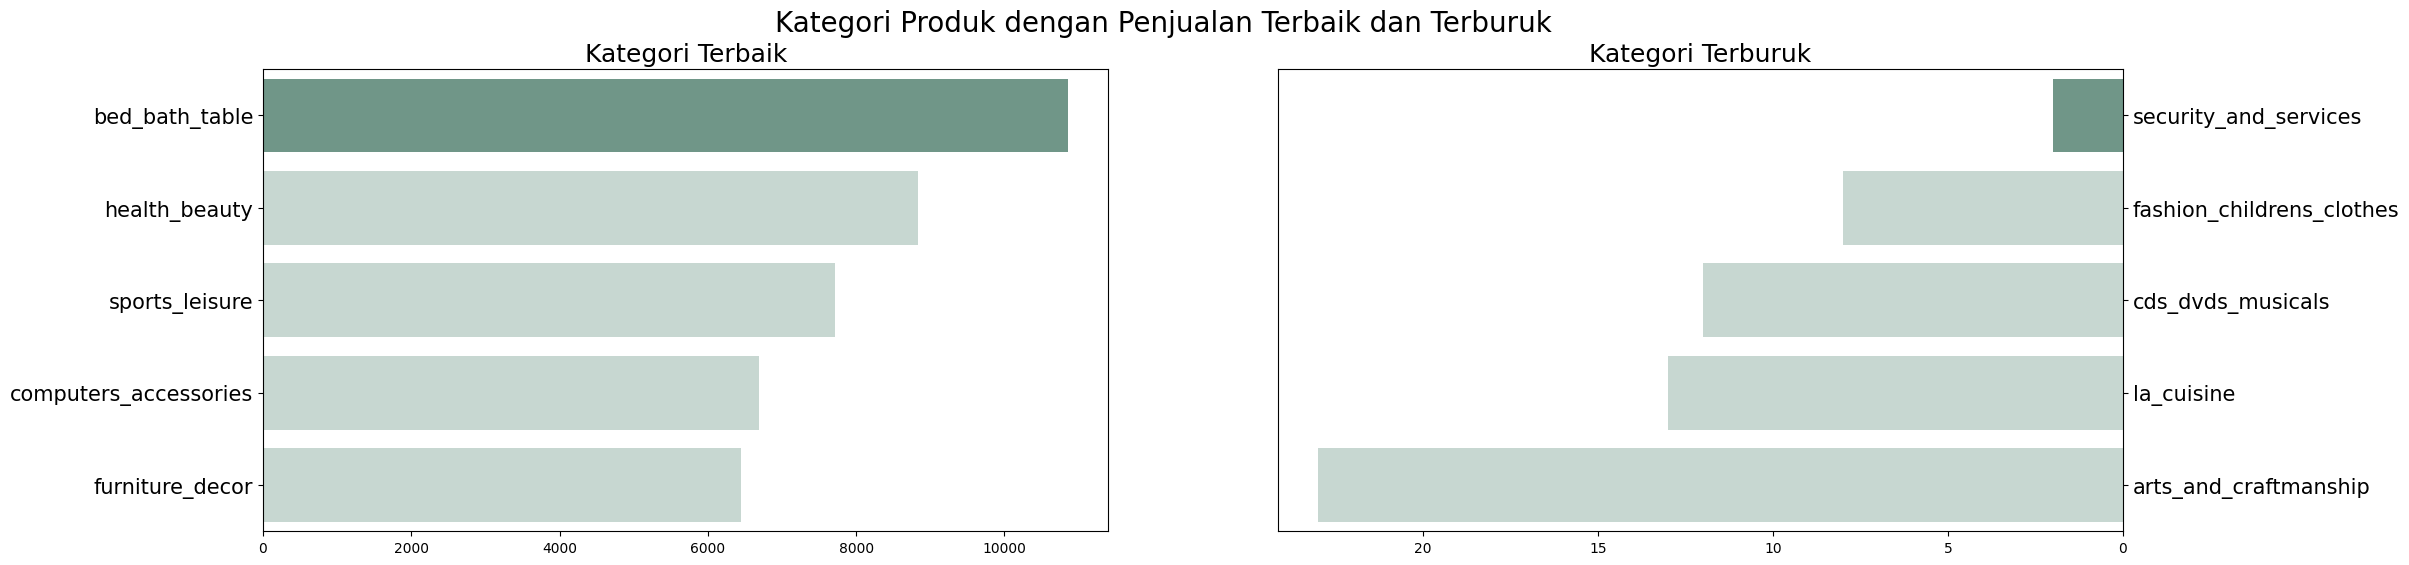

In [68]:
canvas, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#6A9C89", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2"]

sns.barplot(x="product_count", y="category", data=sum_order_item_df.head(5), palette=colors, hue="category", ax=ax[0])
ax[0].set_title("Kategori Terbaik", loc="center", fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_count", y="category", data=sum_order_item_df.sort_values(by="product_count", ascending=True).head(5), palette=colors, hue="category", ax=ax[1])
ax[1].set_title("Kategori Terburuk", loc="center", fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori Produk dengan Penjualan Terbaik dan Terburuk", fontsize=20)
plt.show()

### Bagaimana demografis customers dan sellers berdasarkan city dan state nya?

#### Customer

In [69]:
cust_bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
cust_bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
cust_bycity_df.head(10)

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
5,abaira,2
6,abare,2
7,abatia,3
8,abdon batista,1
9,abelardo luz,6


In [70]:
cust_bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
cust_bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
cust_bystate_df.head(10)

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


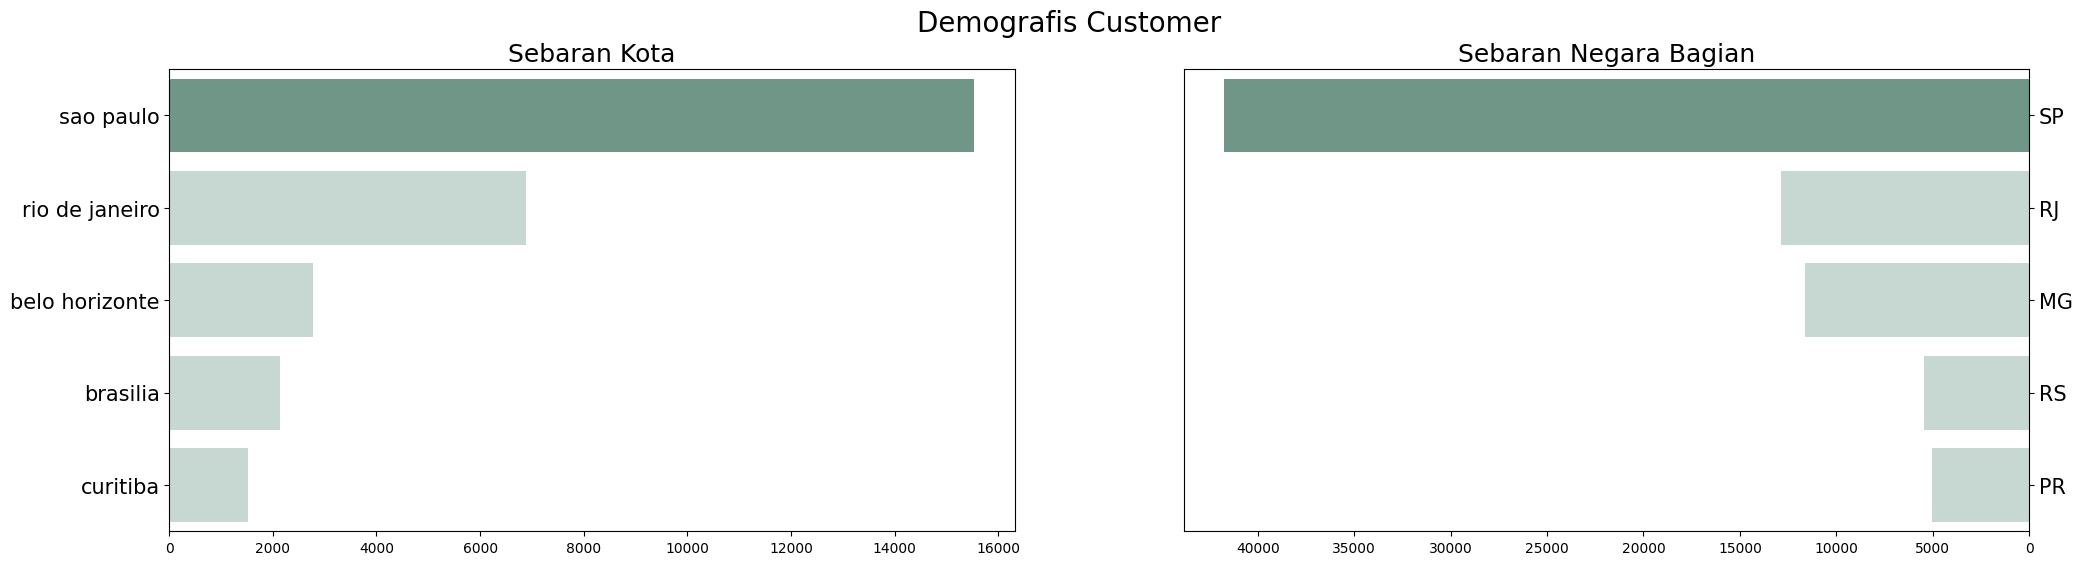

In [71]:
canvas, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#6A9C89", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2"]

sns.barplot(x="customer_count", 
            y="customer_city", 
            data=cust_bycity_df.sort_values(by="customer_count", ascending=False).head(5), 
            palette=colors, 
            hue="customer_city", 
            ax=ax[0])
ax[0].set_title("Sebaran Kota", loc="center", fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_count", 
            y="customer_state", 
            data=cust_bystate_df.sort_values(by="customer_count", ascending=False).head(5), 
            palette=colors, 
            hue="customer_state", 
            ax=ax[1])
ax[1].set_title("Sebaran Negara Bagian", loc="center", fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(axis ='y', labelsize=15)

plt.suptitle("Demografis Customer", fontsize=20)
plt.show()

#### Seller

In [72]:
seller_bycity_df = all_df.groupby(by="seller_city").seller_id.nunique().reset_index()
seller_bycity_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_bycity_df.sort_values(by="seller_count", ascending=False)

,seller_city,seller_count
517,sao paulo,694
159,curitiba,127
450,rio de janeiro,96
64,belo horizonte,68
442,ribeirao preto,52
...,...,...
3,aguas claras df,1
17,ao bernardo do campo,1
16,angra dos reis rj,1
605,vitoria de santo antao,1


In [73]:
seller_bystate_df = all_df.groupby(by="seller_state").seller_id.nunique().reset_index()
seller_bystate_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_bystate_df.sort_values(by="seller_count", ascending=False)

,seller_state,seller_count
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


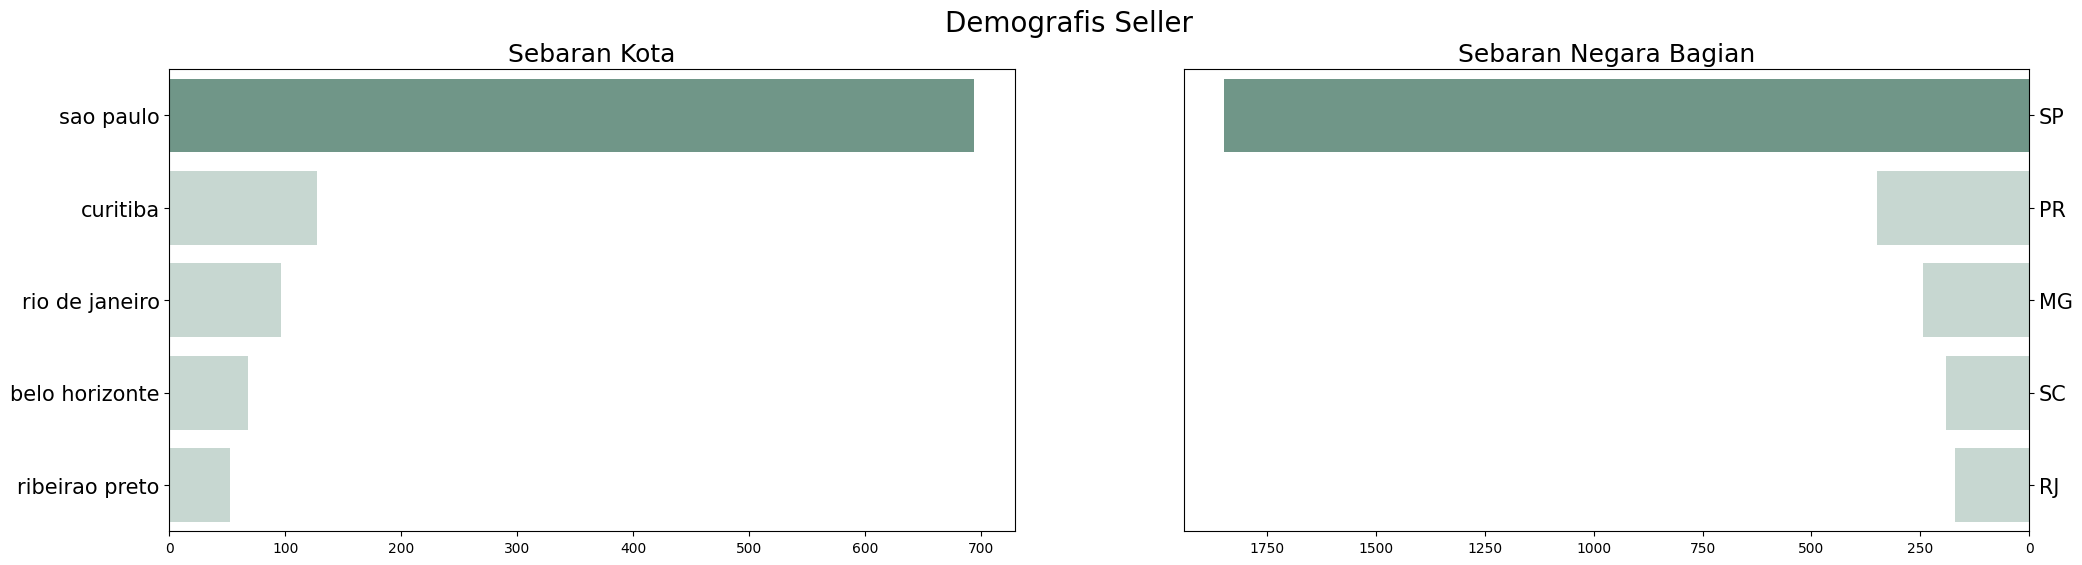

In [74]:
canvas, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#6A9C89", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2"]

sns.barplot(x="seller_count", 
            y="seller_city", 
            data=seller_bycity_df.sort_values(by="seller_count", ascending=False).head(5), 
            palette=colors, 
            hue="seller_city", 
            ax=ax[0])
ax[0].set_title("Sebaran Kota", loc="center", fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="seller_count", 
            y="seller_state", 
            data=seller_bystate_df.sort_values(by="seller_count", ascending=False).head(5), 
            palette=colors, 
            hue="seller_state", 
            ax=ax[1])
ax[1].set_title("Sebaran Negara Bagian", loc="center", fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(axis ='y', labelsize=15)

plt.suptitle("Demografis Seller", fontsize=20)
plt.show()

### Kategori produk apa yang memiliki jumlah rating (review score) tertinggi dan terendah terbanyak?

In [75]:
score5 = all_df[all_df['review_score'] == 5]
highest_df = score5.groupby(by='product_category_name_english').product_id.nunique().reset_index()
highest_df.rename(columns={
    'product_category_name_english': 'category', 
    'product_id': 'five_star'}, inplace=True)

highest_df.head(10)

,category,five_star
0,agro_industry_and_commerce,39
1,air_conditioning,81
2,art,40
3,arts_and_craftmanship,14
4,audio,42
5,auto,1235
6,baby,641
7,bed_bath_table,2405
8,books_general_interest,175
9,books_imported,25


In [76]:
score1 = all_df[all_df['review_score'] == 1]
lowest_df = score1.groupby(by='product_category_name_english').product_id.nunique().reset_index()
lowest_df.rename(columns={
    'product_category_name_english': 'category', 
    'product_id': 'one_star'}, inplace=True)

lowest_df.head(10)

,category,one_star
0,agro_industry_and_commerce,17
1,air_conditioning,27
2,art,10
3,arts_and_craftmanship,2
4,audio,25
5,auto,352
6,baby,242
7,bed_bath_table,989
8,books_general_interest,31
9,books_imported,5


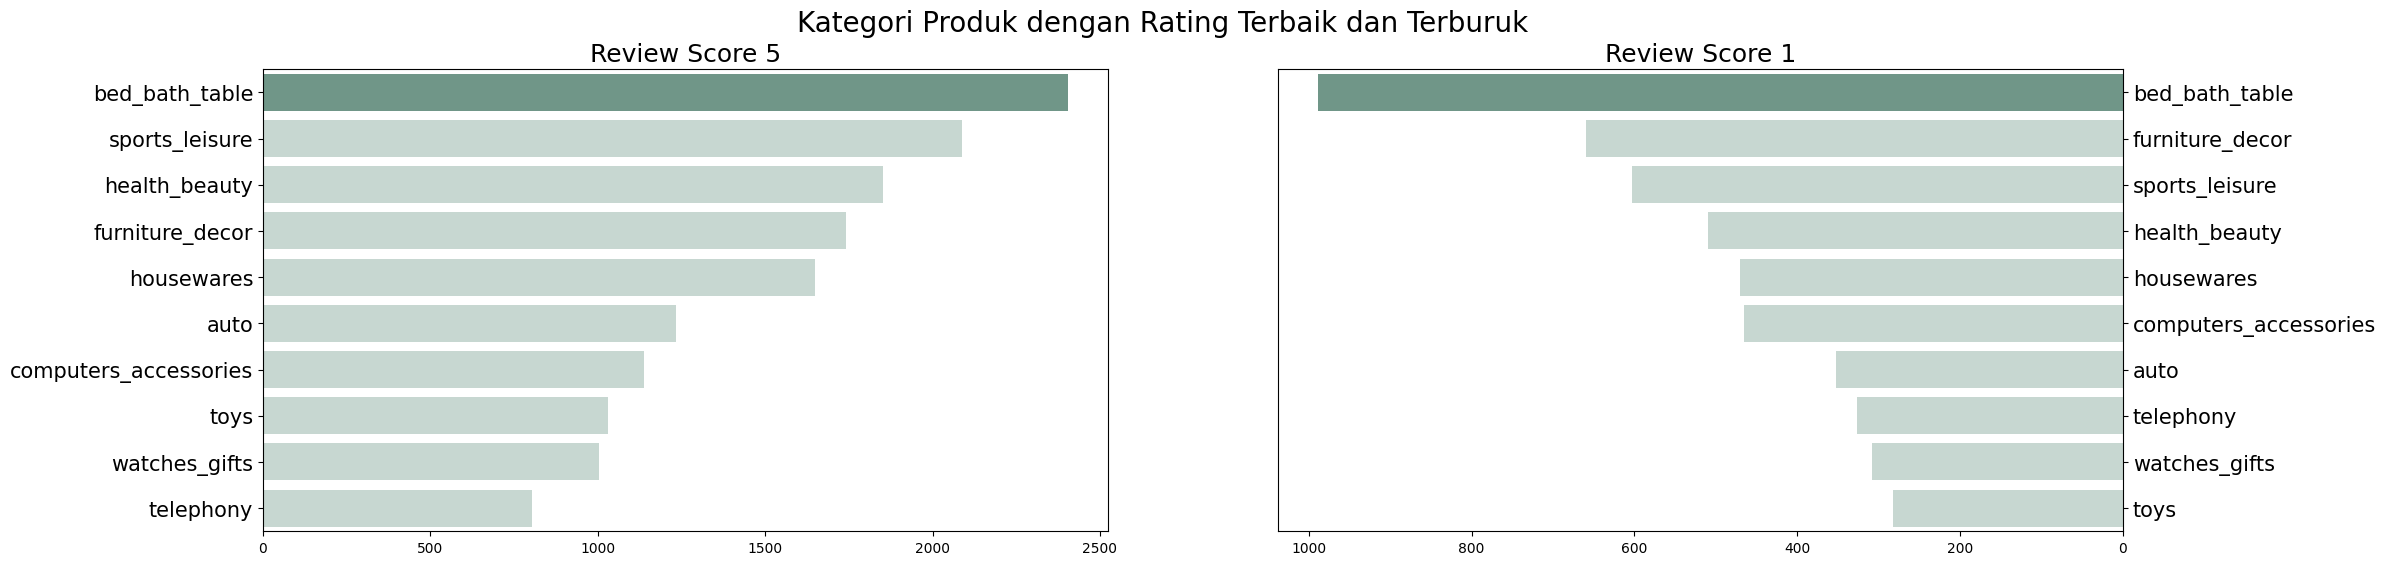

In [77]:
canvas, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#6A9C89", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2", "#C4DAD2"]

sns.barplot(x="five_star", 
            y="category", 
            data=highest_df.sort_values(by="five_star", ascending=False).head(10), 
            palette=colors, 
            hue="category", 
            ax=ax[0])
ax[0].set_title("Review Score 5", loc="center", fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="one_star", 
            y="category", 
            data=lowest_df.sort_values(by="one_star", ascending=False).head(10), 
            palette=colors, 
            hue="category", 
            ax=ax[1])
ax[1].set_title("Review Score 1", loc="center", fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(axis ='y', labelsize=15)

plt.suptitle("Kategori Produk dengan Rating Terbaik dan Terburuk", fontsize=20)
plt.show()

**Insight:**

Berdasarkan visualisasi data di atas dapat diketahui bahwa
- kategori produk yang paling laku adalah bed_bath_table
- kategori produk yang paling tidak laku adalah security_and_services
- customer dan seller paling banyak berada di kota sao paulo dan negara bagian SP
- kategori produk dengan rating 5 (tertinggi) terbanyak adalah bed_bath_table
- kategori produk dengan rating 1 (terendah) terbanyak juga bed_bath_table

## Analisis Lanjutan: RFM Analysis

In [78]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,MG,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,SP,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [99]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.rename(columns={
    "order_purchase_timestamp": "max_order_timestamp",
    "order_id": "frequency",
    "price": "monetary"
}, inplace=True)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [100]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


In [81]:
new_rfm_df = rfm_df.drop('max_order_timestamp', axis=1)
new_rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [82]:
new_rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,137.286667,290.272956
std,0.0,210.887422,153.670615
min,1.0,0.000000,0.000000
25%,1.0,45.000000,166.000000
50%,1.0,85.900000,272.000000
75%,1.0,149.900000,400.000000
max,1.0,13440.000000,773.000000


In [83]:
new_rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,0.0,0
51713,856336203359aa6a61bf3826f7d84c49,1,0.0,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,0.0,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,0.0,16
15595,2823ffda607a2316375088e0d00005ec,1,0.0,18


In [84]:
new_rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
99440,ffffe8b65bbe3087b653a978c870db99,1,0.00,383
99424,fff5169e583fd07fac9fec88962f189d,1,144.00,159
99423,fff4fdd0de70a51d4e0f57a4c1c6bfae,1,13.65,191
99422,fff4f0c85a4d710abe06599e1ed08a42,1,75.00,571
99421,fff415b4c72e09483a25c15108c65d31,1,48.90,327


In [85]:
new_rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8546,1617b1357756262bfa56ab541c47bc16,1,13440.0,383
91985,ec5b2ba62e574342386871631fafd3fc,1,7160.0,94
77522,c6e2731c5b391845f6800c97401a43a9,1,6735.0,612
95124,f48d464a0baaea338cb25f816991ab1f,1,6729.0,84
24771,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.0,511


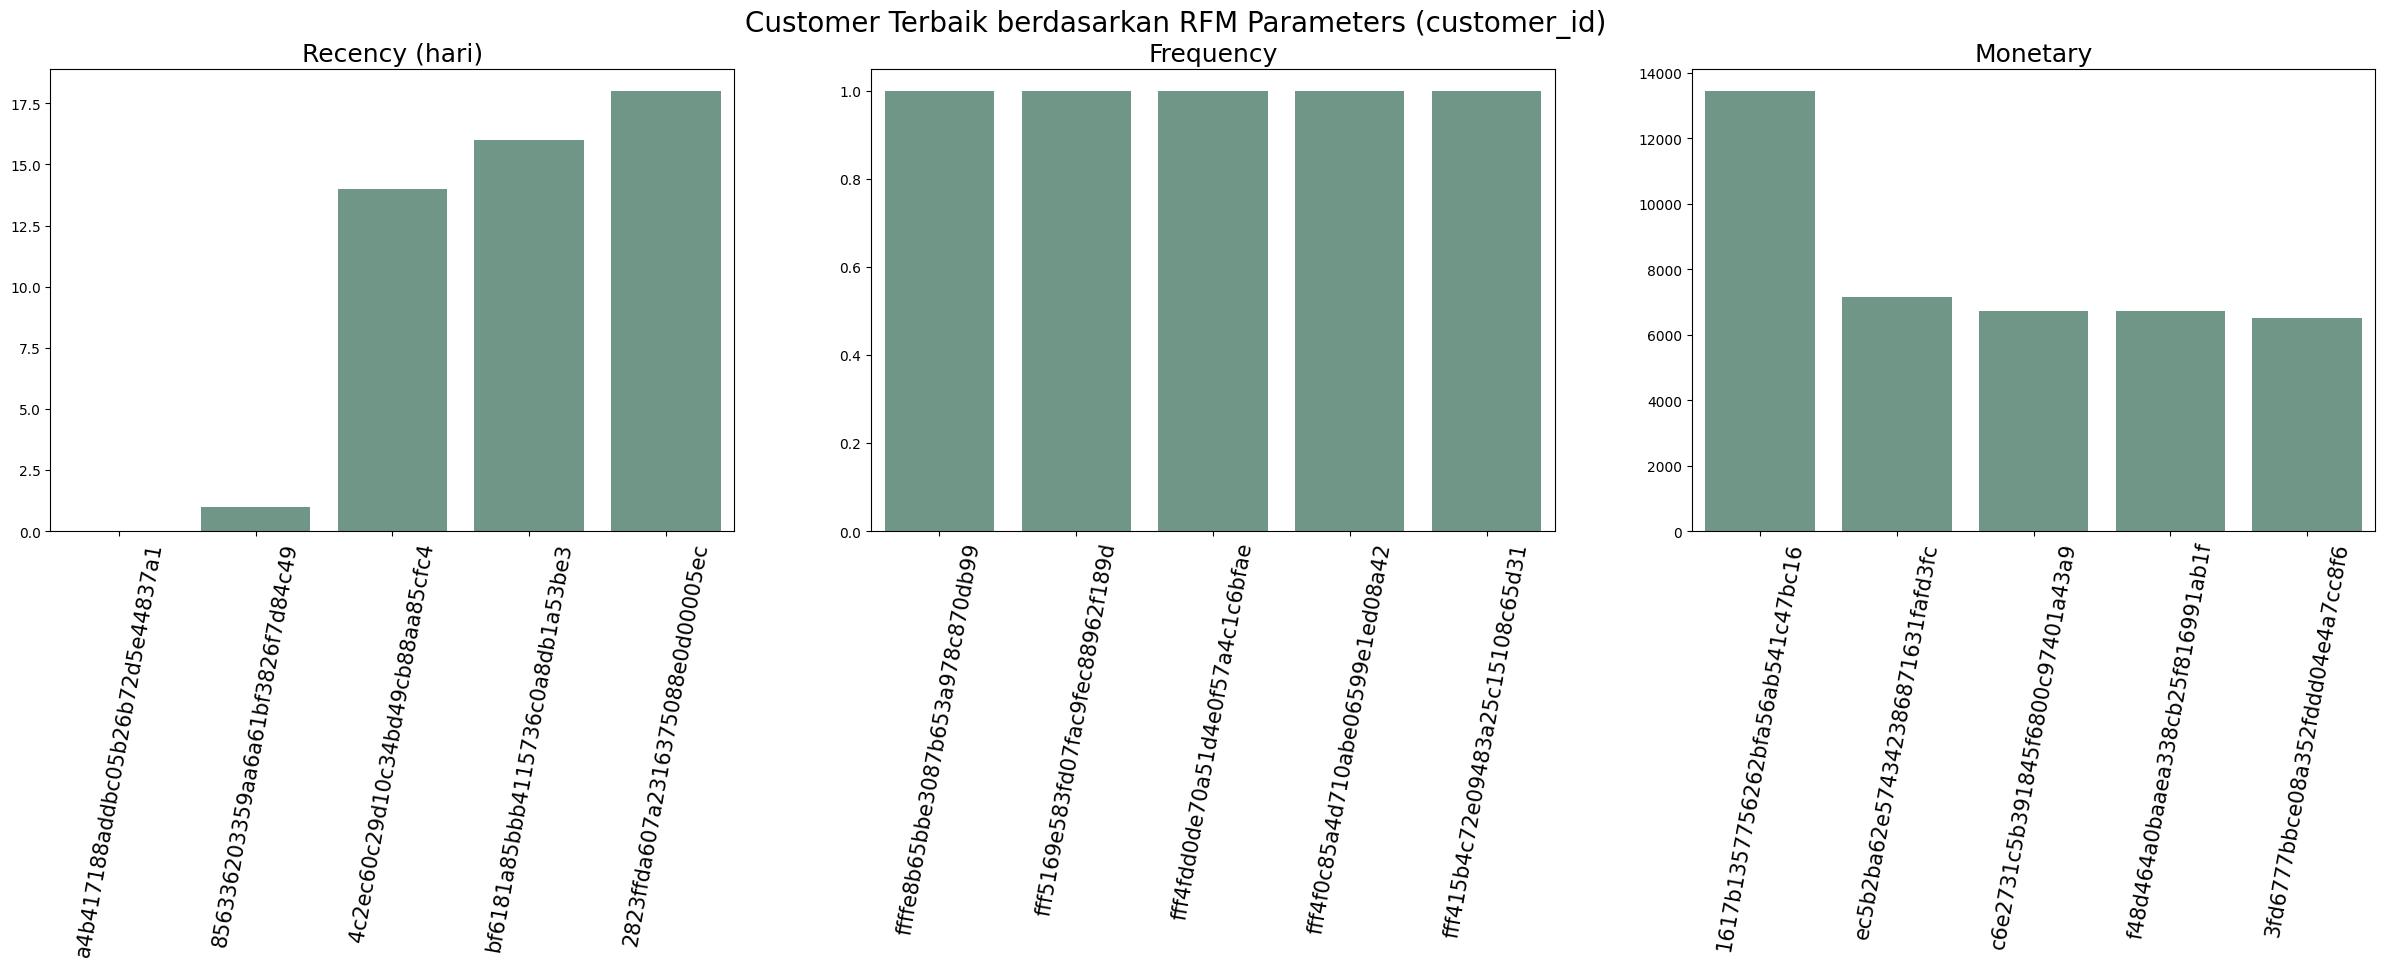

In [86]:
canvas, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#6A9C89", "#6A9C89", "#6A9C89", "#6A9C89", "#6A9C89"]

sns.barplot(y="recency", x="customer_id", data=new_rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="customer_id", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=80)

sns.barplot(y="frequency", x="customer_id", data=new_rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="customer_id", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=80)

sns.barplot(y="monetary", x="customer_id", data=new_rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="customer_id", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=80)

plt.suptitle("Customer Terbaik berdasarkan RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Mengurutkan customer berdasarkan RFM score

In [87]:
new_rfm_df['r_rank'] = new_rfm_df['recency'].rank(ascending=False)
new_rfm_df['f_rank'] = new_rfm_df['frequency'].rank(ascending=True)
new_rfm_df['m_rank'] = new_rfm_df['monetary'].rank(ascending=True)

new_rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34364.5,49721.0,51092.0
1,000161a058600d5901f007fab4c27140,1,54.90,458,16871.5,49721.0,31951.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2882.0,49721.0,80839.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21181.5,49721.0,74351.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,66986.5,49721.0,53522.0


In [88]:
new_rfm_df['r_rank_norm'] = (new_rfm_df['r_rank']/new_rfm_df['r_rank'].max())*100
new_rfm_df['f_rank_norm'] = (new_rfm_df['f_rank']/new_rfm_df['f_rank'].max())*100
new_rfm_df['m_rank_norm'] = (new_rfm_df['m_rank']/new_rfm_df['m_rank'].max())*100
 
new_rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
new_rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.557677,100.0,51.379210
1,000161a058600d5901f007fab4c27140,1,54.90,458,16.966342,100.0,32.130610
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.898201,100.0,81.293430
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.300570,100.0,74.768958
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,67.363060,100.0,53.822870


In [89]:
new_rfm_df['RFM_score'] = 0.15*new_rfm_df['r_rank_norm']+0.28 * \
    new_rfm_df['f_rank_norm']+0.57*new_rfm_df['m_rank_norm']
new_rfm_df['RFM_score'] *= 0.05
new_rfm_df = new_rfm_df.round(2)
new_rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.44
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.44
5,0004164d20a9e969af783496f3408652,2.52
6,000419c5494106c306a97b5635748086,2.34


### Segmentasi customer berdasarkan RFM score

In [90]:
new_rfm_df["customer_segment"] = np.where(
    new_rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        new_rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            new_rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                new_rfm_df['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))))

new_rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.44,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.44,Medium value customer
5,0004164d20a9e969af783496f3408652,2.52,Low value customers
6,000419c5494106c306a97b5635748086,2.34,Low value customers
7,00046a560d407e99b969756e0b10f282,3.63,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.82,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [91]:
customer_segment_df = new_rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16181
1,Lost customers,1205
2,Low value customers,41724
3,Medium value customer,34753
4,Top customers,5578


In [92]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

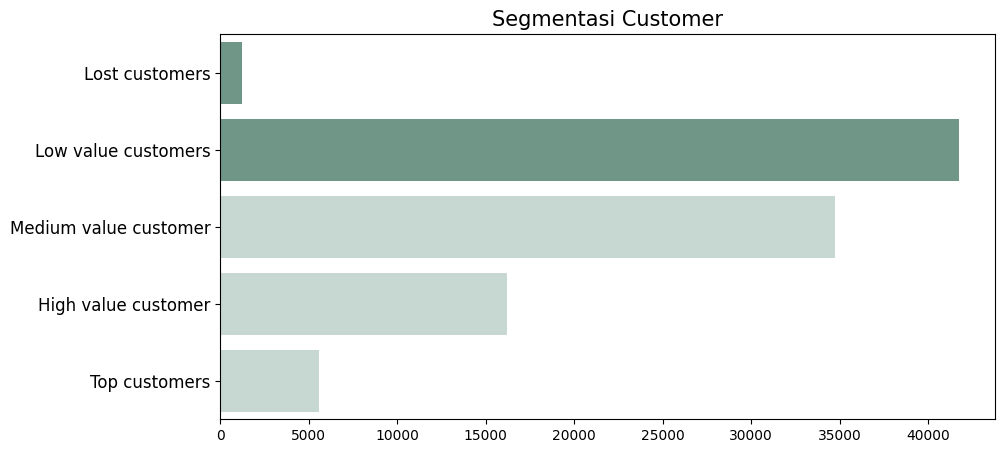

In [1]:
plt.figure(figsize=(10, 5))
colors = ["#6A9C89", "#6A9C89", "#C4DAD2", "#C4DAD2", "#C4DAD2"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors,
    hue="customer_segment"
)
plt.title("Segmentasi Customer", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

**1. Kategori produk apa yang paling banyak dan paling sedikit terjual?**
- Berdasarkan hasil visualisasi dan explanatory data, dapat dilihat bahwa kategori produk ***bed_bath_table*** adalah produk yang paling banyak terjual, sedangkan ***security_and_services*** adalah produk yang paling sedikit terjual.

**2. Bagaimana demografis customers dan sellers berdasarkan city dan state nya?**
- State atau negara bagian dengan jumlah customer terbanyak adalah ***SP***, maka city atau kota dengan jumlah customer terbanyak adalah ***São Paulo***. 
- Pun sama dengan customer, state dengan jumlah seller terbanyak adalah ***SP***, oleh karena itu city dengan seller terbanyak juga ***São Paulo***.

**3. Kategori produk apa yang memiliki jumlah rating tertinggi dan terendah terbanyak?**
- Dari visualisasi yang telah dibuat, terlihat bahwa kategori dengan rating score 5 paling banyak adalah kategori ***bed_bath_table***, disusul dengan ***sport_leisure*** dan ***health_beauty***. 
- Pada grafik di sisi kanan, terlihat bahwa katergori dengan rating score 1 terbanyak juga berasal dari kategori ***bed_bath_table***, lalu disusul dengan ***furniture_decor*** dan ***sport_leasure***.

**4. Hasil analisis RFM**
- Setelah menghitung RFM score untuk setiap customer, score tersebut dibagi menjadi 5 kategori, yaitu top, high, medium, low, dan lost. Kategori customer yang paling dominan adalah low value customer, disusul dengan medium value, dan yang paling sedikit adalah lost value. 
- Dengan low value sebagai segmentasi customer yang paling dominan, menunjukkan bahwa masih banyak customer yang kontribusi atau aktifitasnya rendah untuk bisnis e-commerce.
- Perlu adanya strategi permasaran tambahan untuk meningkatkan engagement dari low dan medium value demi meningkatkan pendapatan bisnis.

In [94]:
all_df.to_csv("all_data.csv", index=False)